# Plot curves for some specific sera

In [1]:
import pickle
import pandas as pd
import neutcurve
import numpy as np
import altair as alt

In [3]:
print(neutcurve.__version__)

2.1.0


Get variables passed by `snakemake`:

In [4]:
curvefits_pickle = snakemake.input.curvefits_pickle
#curvefits_pickle ='results/aggregated_titers/curvefits_DRIVE.pickle'
plot_pdf = snakemake.output.plot_pdf
ngsneuttiters = pd.read_csv("results/aggregated_titers/titers_DRIVE.csv")

Read the `neutcurve.CurveFits` for all the fits from the pickle file:

In [5]:
print(f"Reading `CurveFits` from {curvefits_pickle=}")

with open(curvefits_pickle, "rb") as f:
    fits_seqbasedneut = pickle.load(f)

Reading `CurveFits` from curvefits_pickle='results/aggregated_titers/curvefits_DRIVE.pickle'


Read in the data from the GFP based neutralization assay

In [6]:
pooledsera_datafile = './traditional_neutralization_assay_validations/231122_passagedvirus_D10066D10175D10366D10378_fracinfectivity.csv'
data = pd.read_csv(pooledsera_datafile)
data = data.replace('HI19','A/Hawaii/70/2019')
data = data.replace('Eng22','A/England/220200318/2022')
data = data.replace('WI19',"A/Wisconsin/588/2019")
data

serum  concentration  replicate                     virus  \
0      D10066_day0       0.016667          1          A/Hawaii/70/2019   
1      D10066_day0       0.005556          1          A/Hawaii/70/2019   
2      D10066_day0       0.001852          1          A/Hawaii/70/2019   
3      D10066_day0       0.000617          1          A/Hawaii/70/2019   
4      D10066_day0       0.000206          1          A/Hawaii/70/2019   
..             ...            ...        ...                       ...   
379  D10378_day182       0.000617          2  A/England/220200318/2022   
380  D10378_day182       0.000206          2  A/England/220200318/2022   
381  D10378_day182       0.000069          2  A/England/220200318/2022   
382  D10378_day182       0.000023          2  A/England/220200318/2022   
383  D10378_day182       0.000008          2  A/England/220200318/2022   

     fraction infectivity  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0                1.085642         NaN         NaN         NaN         NaN   
1                1.321345         NaN         NaN         NaN         NaN   
2                1.213689         NaN         NaN         NaN         NaN   
3                1.212344         NaN         NaN         NaN         NaN   
4                0.988708         NaN         NaN         NaN         NaN   
..                    ...         ...         ...         ...         ...   
379              0.953999         NaN         NaN         NaN         NaN   
380              1.113009         NaN         NaN         NaN         NaN   
381              1.142425         NaN         NaN         NaN         NaN   
382              0.902121         NaN         NaN         NaN         NaN   
383              0.777128         NaN         NaN         NaN         NaN   

     Unnamed: 9  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
379         NaN  
380         NaN  
381         NaN  
382         NaN  
383         NaN  

[384 rows x 10 columns]

In [7]:
data['fraction infectivity'] = np.where(data['fraction infectivity']>1,1,data['fraction infectivity'])
data['replicate'] = "replicate"+data['replicate'].astype(str)

In [8]:
serumnames = data['serum'].tolist()
mapped_names = {}
mapped_days = {}
for i in serumnames:
    indiv = i[0:6]
    day= i[7:]
    rename = indiv
    mapped_names[i] = rename
    mapped_days[i]=day
data['individual'] = data['serum'].map(mapped_names)
data['day'] = data['serum'].map(mapped_days)

In [9]:
fits_traditionalneut = neutcurve.CurveFits(data, fixtop=False)
fits_traditionalneut.sera

['D10066_day0',
 'D10066_day182',
 'D10175_day0',
 'D10175_day182',
 'D10366_day0',
 'D10366_day182',
 'D10378_day0',
 'D10378_day182']

Plot curves for specific sera and viruses of interest (note that there are **tons** of curves in `fits` so we would not want to plot them all):

Saving to plot_pdf='results/plots_for_paper/plot_specific_sera/curves.pdf'


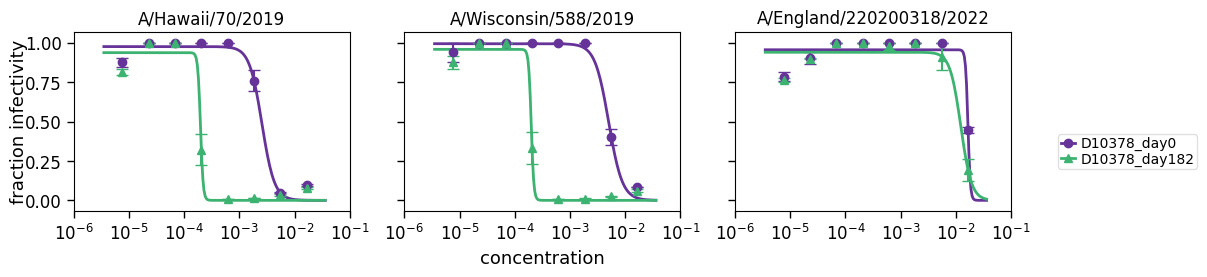

In [47]:
fig, ax = fits_traditionalneut.plotViruses(
    sera=[
 'D10378_day0',
 'D10378_day182'],
    viruses=["A/Hawaii/70/2019", "A/Wisconsin/588/2019","A/England/220200318/2022"],
    ncol=3,
    attempt_shared_legend=True,
    titlesize=12,
    labelsize=13,
    ticksize=12,
    max_sera_per_subplot=8,
#    colors=['#999999', '#009E73'],
    colors=['rebeccapurple','mediumseagreen'],
    legendfontsize=10,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1.1,
    heightscale=1,
    linewidth=2
)

print(f"Saving to {plot_pdf=}")
fig.savefig("results/plots_for_paper/Fig4_curves_GFP.svg")
fig.savefig(plot_pdf)

Saving to plot_pdf='results/plots_for_paper/plot_specific_sera/curves.pdf'


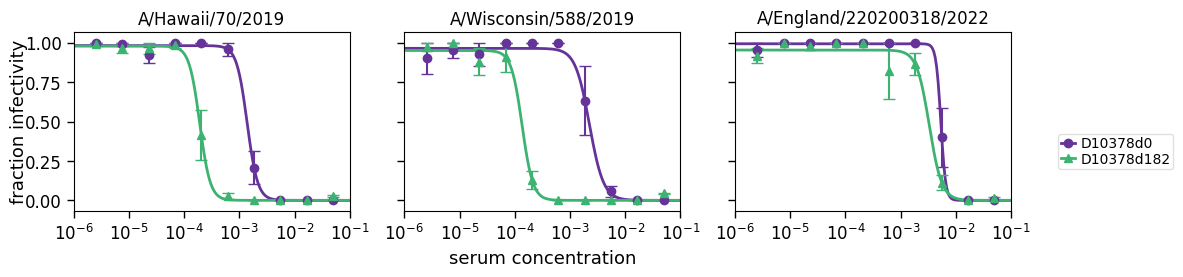

In [48]:
fig, ax = fits_seqbasedneut.plotViruses(
    sera=[
 'D10378d0',
 'D10378d182'],
    viruses=["A/Hawaii/70/2019", "A/Wisconsin/588/2019","A/England/220200318/2022"],
    ncol=3,
    attempt_shared_legend=True,
    titlesize=12,
    labelsize=13,
    ticksize=12,
    max_sera_per_subplot=8,
#    colors=['#999999', '#009E73'],
    colors=['rebeccapurple','mediumseagreen'],
    legendfontsize=10,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1.1,
    heightscale=1,
    linewidth=2
)

print(f"Saving to {plot_pdf=}")
fig.savefig("results/plots_for_paper/Fig4_curves_NGS.svg")

In [14]:
fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10002d0","D10002d30","D10323d0","D10323d30","D10323d182","D10318d0","D10318d30","D10318d182"],
    ncol=24,
    attempt_shared_legend=False,
    titlesize=10,
    labelsize=11,
    ticksize=8,
    legendfontsize=8,
    widthscale=0.8,
    subplot_titles = "{serum} against \n {virus}"
)
fig.savefig("results/plots_for_paper/SupplementalPlate1curves3_forslide.png")

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fca378559e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fc98f8adb20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

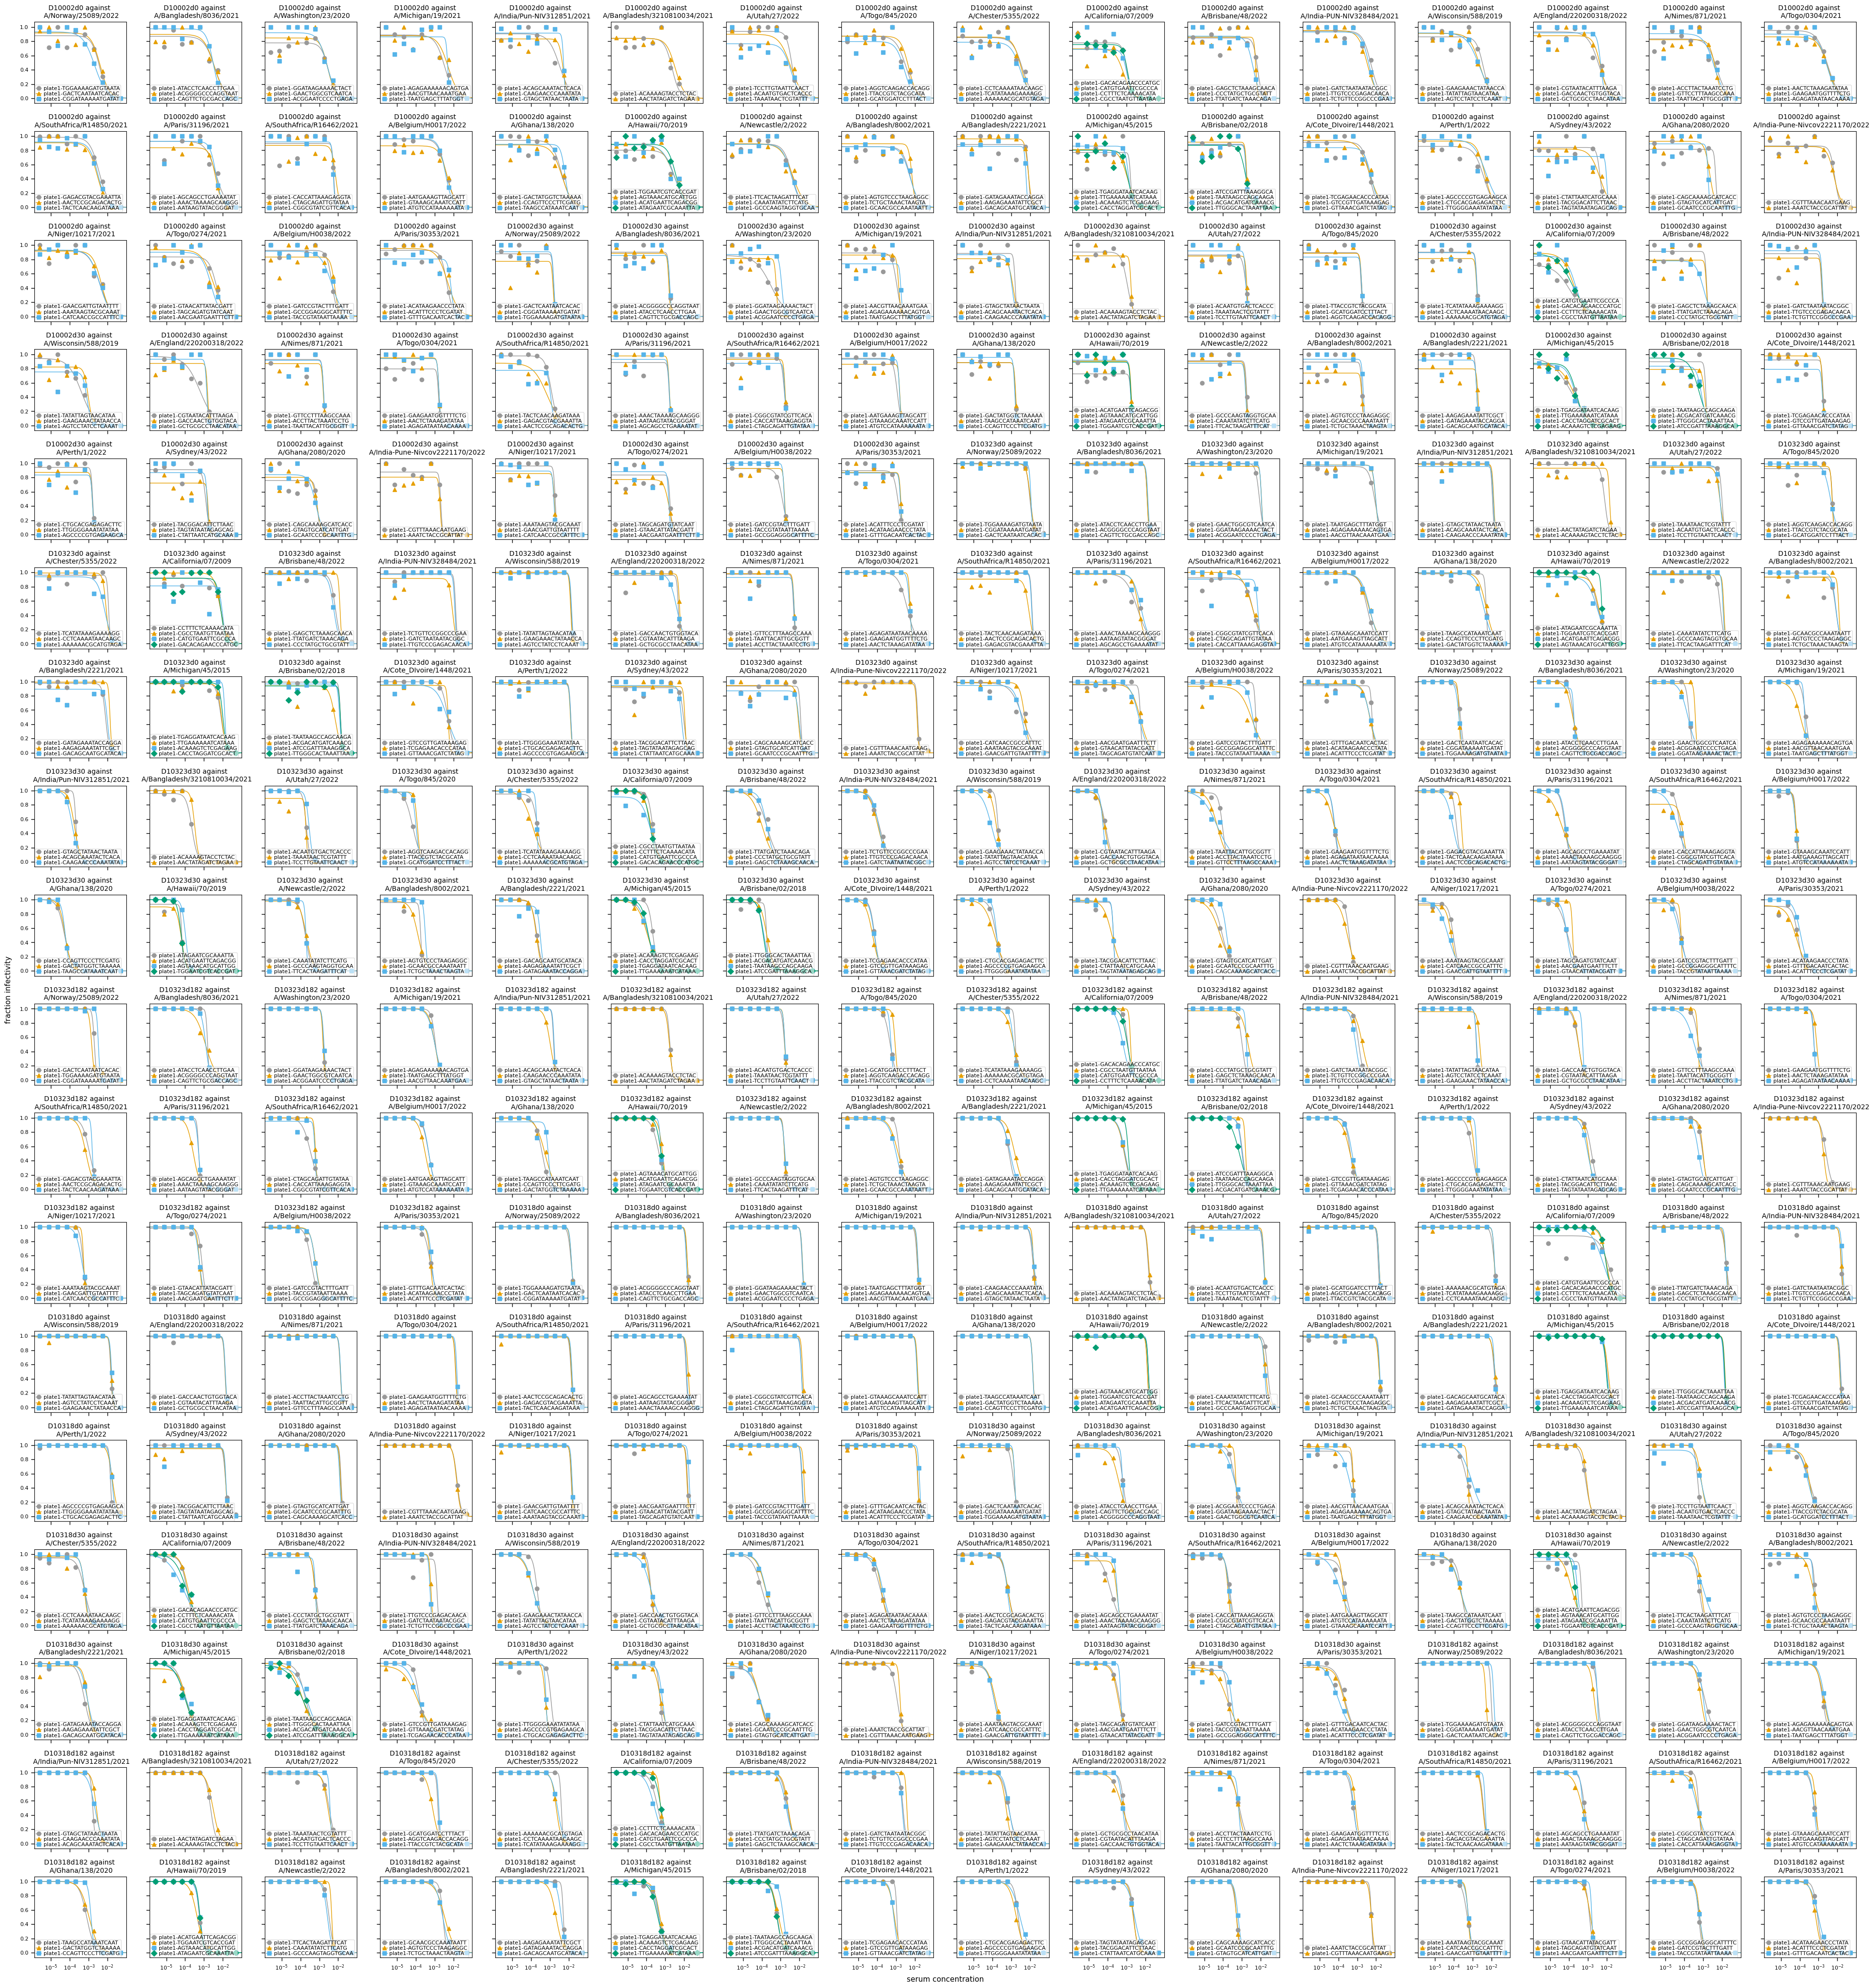

In [21]:
#Plot all replicates on a single plate (this takes an eon)
fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10002d0","D10002d30","D10323d0","D10323d30","D10323d182","D10318d0","D10318d30","D10318d182"],
    ncol=16,
    attempt_shared_legend=False,
    titlesize=10,
    labelsize=11,
    ticksize=8,
    legendfontsize=8,
    widthscale=0.8,
    subplot_titles = "{serum} against \n {virus}"
)
fig.savefig("results/plots_for_paper/SupplementalPlate1curves3.svg")
#sera=["D10002d0","D10002d30","D10323d0","D10323d30","D10323d182","D10318d0","D10318d30","D10318d182"],

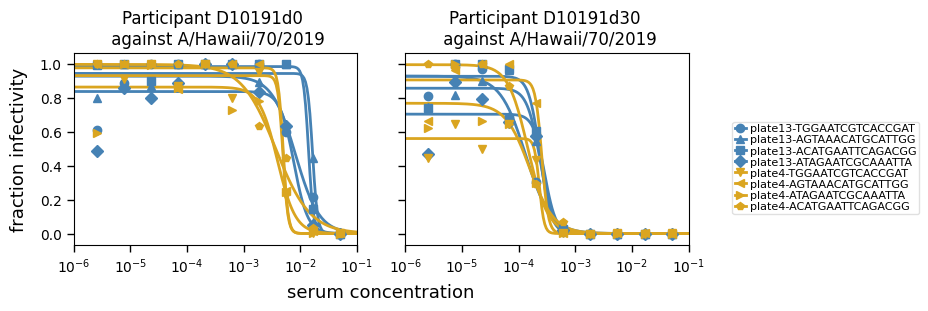

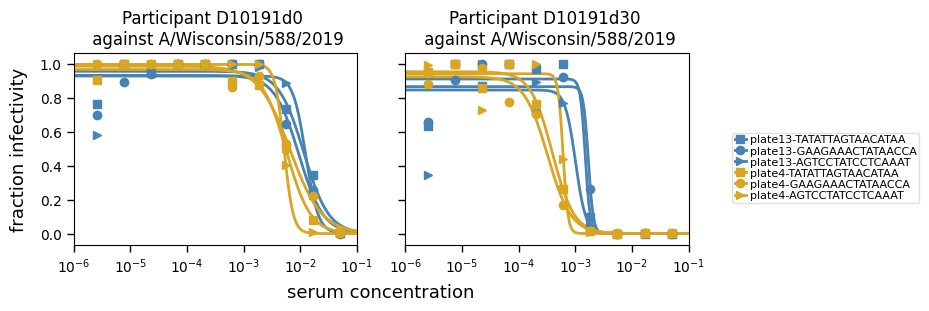

In [22]:
#Plot subset of curves for example figure
fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10191d0", "D10191d30"],
    viruses=["A/Hawaii/70/2019"],
    ncol=3,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    attempt_shared_legend=True,
#    colors=['#9467bd','#9467bd','#9467bd','#9467bd','#17becf','#17becf','#17becf','#17becf'],
    colors=['steelblue','steelblue','steelblue','steelblue','goldenrod','goldenrod','goldenrod','goldenrod'],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1.1,
    heightscale=1.1,
    subplot_titles = "Participant {serum} \n against {virus}",
    linewidth=2
)
fig.savefig("results/plots_for_paper/Fig3_curves2.svg")
fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10191d0","D10191d30"],
    viruses=["A/Wisconsin/588/2019"],
    ncol=3,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    attempt_shared_legend=True,
#    colors=['#9467bd','#9467bd','#9467bd','#9467bd','#17becf','#17becf','#17becf','#17becf'],
    colors=['steelblue','steelblue','steelblue','goldenrod','goldenrod','goldenrod'],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    markers=['s','o','>'],
    widthscale=1.1,
    heightscale=1.1,
    subplot_titles = "Participant {serum} \n against {virus}",
    linewidth=2
)
fig.savefig("results/plots_for_paper/Fig3_curves1.svg")

In [23]:
#Make a dataframe with just the sera and strains that were validated by GFP assay
listofvalidations = ['D10378d0','D10378d182','D10366d0','D10366d182','D10175d0','D10175d182','D10066d0','D10066d182']
validatedviruses = ["A/Hawaii/70/2019", "A/Wisconsin/588/2019","A/England/220200318/2022"]
NGSNeuttiters_validated = ngsneuttiters.loc[ngsneuttiters['serum'].isin(listofvalidations)]
NGSNeuttiters_validated = NGSNeuttiters_validated.loc[NGSNeuttiters_validated['virus'].isin(validatedviruses)]
NGSNeuttiters_validated

group       serum                     virus    titer   titer_bound  \
623   DRIVE    D10066d0  A/England/220200318/2022    199.2  interpolated   
626   DRIVE    D10066d0          A/Hawaii/70/2019    150.9  interpolated   
647   DRIVE    D10066d0      A/Wisconsin/588/2019    162.7  interpolated   
659   DRIVE  D10066d182  A/England/220200318/2022   4294.0  interpolated   
662   DRIVE  D10066d182          A/Hawaii/70/2019   3607.0  interpolated   
683   DRIVE  D10066d182      A/Wisconsin/588/2019  12590.0  interpolated   
1019  DRIVE    D10175d0  A/England/220200318/2022   1583.0  interpolated   
1022  DRIVE    D10175d0          A/Hawaii/70/2019  10090.0  interpolated   
1043  DRIVE    D10175d0      A/Wisconsin/588/2019   1867.0  interpolated   
1055  DRIVE  D10175d182  A/England/220200318/2022   3129.0  interpolated   
1058  DRIVE  D10175d182          A/Hawaii/70/2019  14470.0  interpolated   
1079  DRIVE  D10175d182      A/Wisconsin/588/2019  10580.0  interpolated   
2351  DRIVE    D10366d0  A/England/220200318/2022   2983.0  interpolated   
2354  DRIVE    D10366d0          A/Hawaii/70/2019   3681.0  interpolated   
2375  DRIVE    D10366d0      A/Wisconsin/588/2019    854.0  interpolated   
2387  DRIVE  D10366d182  A/England/220200318/2022   2242.0  interpolated   
2390  DRIVE  D10366d182          A/Hawaii/70/2019   3960.0  interpolated   
2411  DRIVE  D10366d182      A/Wisconsin/588/2019    878.2  interpolated   
2459  DRIVE    D10378d0  A/England/220200318/2022    187.5  interpolated   
2462  DRIVE    D10378d0          A/Hawaii/70/2019    654.7  interpolated   
2483  DRIVE    D10378d0      A/Wisconsin/588/2019    436.9  interpolated   
2495  DRIVE  D10378d182  A/England/220200318/2022    362.4  interpolated   
2498  DRIVE  D10378d182          A/Hawaii/70/2019   5423.0  interpolated   
2519  DRIVE  D10378d182      A/Wisconsin/588/2019   6542.0  interpolated   

      titer_sem  n_replicates  titer_as  
623       19.62             3  midpoint  
626       15.19             4  midpoint  
647       33.38             3  midpoint  
659     1509.00             3  midpoint  
662      643.00             4  midpoint  
683     1706.00             3  midpoint  
1019      82.29             3  midpoint  
1022    2046.00             4  midpoint  
1043     170.90             3  midpoint  
1055     446.00             3  midpoint  
1058    1948.00             4  midpoint  
1079    1826.00             3  midpoint  
2351     564.70             3  midpoint  
2354    1158.00             4  midpoint  
2375     133.00             3  midpoint  
2387     515.10             3  midpoint  
2390     572.90             4  midpoint  
2411     161.90             3  midpoint  
2459      23.12             3  midpoint  
2462      32.17             4  midpoint  
2483      91.22             3  midpoint  
2495      50.17             3  midpoint  
2498     713.50             4  midpoint  
2519     881.80             3  midpoint

In [24]:
# We named these with a different format in the GFP file, need to make a list of names that can be reconciled
serumnames = NGSNeuttiters_validated['serum'].tolist()
mapped_names = {}
for i in serumnames:
    indiv = i[0:6]
    day= i[7:]
    rename = indiv + "_day" + day
    mapped_names[i] = rename
NGSNeuttiters_validated['serum_rename'] = NGSNeuttiters_validated['serum'].map(mapped_names)
NGSNeuttiters_validated = NGSNeuttiters_validated.drop(columns=['n_replicates','titer_sem','titer_bound']).rename(columns={"nt50": "nt50_seqneut","serum_rename": "serum_GFPname"})
NGSNeuttiters_validated

group       serum                     virus    titer  titer_as  \
623   DRIVE    D10066d0  A/England/220200318/2022    199.2  midpoint   
626   DRIVE    D10066d0          A/Hawaii/70/2019    150.9  midpoint   
647   DRIVE    D10066d0      A/Wisconsin/588/2019    162.7  midpoint   
659   DRIVE  D10066d182  A/England/220200318/2022   4294.0  midpoint   
662   DRIVE  D10066d182          A/Hawaii/70/2019   3607.0  midpoint   
683   DRIVE  D10066d182      A/Wisconsin/588/2019  12590.0  midpoint   
1019  DRIVE    D10175d0  A/England/220200318/2022   1583.0  midpoint   
1022  DRIVE    D10175d0          A/Hawaii/70/2019  10090.0  midpoint   
1043  DRIVE    D10175d0      A/Wisconsin/588/2019   1867.0  midpoint   
1055  DRIVE  D10175d182  A/England/220200318/2022   3129.0  midpoint   
1058  DRIVE  D10175d182          A/Hawaii/70/2019  14470.0  midpoint   
1079  DRIVE  D10175d182      A/Wisconsin/588/2019  10580.0  midpoint   
2351  DRIVE    D10366d0  A/England/220200318/2022   2983.0  midpoint   
2354  DRIVE    D10366d0          A/Hawaii/70/2019   3681.0  midpoint   
2375  DRIVE    D10366d0      A/Wisconsin/588/2019    854.0  midpoint   
2387  DRIVE  D10366d182  A/England/220200318/2022   2242.0  midpoint   
2390  DRIVE  D10366d182          A/Hawaii/70/2019   3960.0  midpoint   
2411  DRIVE  D10366d182      A/Wisconsin/588/2019    878.2  midpoint   
2459  DRIVE    D10378d0  A/England/220200318/2022    187.5  midpoint   
2462  DRIVE    D10378d0          A/Hawaii/70/2019    654.7  midpoint   
2483  DRIVE    D10378d0      A/Wisconsin/588/2019    436.9  midpoint   
2495  DRIVE  D10378d182  A/England/220200318/2022    362.4  midpoint   
2498  DRIVE  D10378d182          A/Hawaii/70/2019   5423.0  midpoint   
2519  DRIVE  D10378d182      A/Wisconsin/588/2019   6542.0  midpoint   

      serum_GFPname  
623     D10066_day0  
626     D10066_day0  
647     D10066_day0  
659   D10066_day182  
662   D10066_day182  
683   D10066_day182  
1019    D10175_day0  
1022    D10175_day0  
1043    D10175_day0  
1055  D10175_day182  
1058  D10175_day182  
1079  D10175_day182  
2351    D10366_day0  
2354    D10366_day0  
2375    D10366_day0  
2387  D10366_day182  
2390  D10366_day182  
2411  D10366_day182  
2459    D10378_day0  
2462    D10378_day0  
2483    D10378_day0  
2495  D10378_day182  
2498  D10378_day182  
2519  D10378_day182

In [25]:
#Calculate NT50 for traditional neut assay and drop unused columns
fitsdf = fits_traditionalneut.fitParams()
fitsdf["Reciprocal_ic50"] = 1/fitsdf['ic50']

GFPneuts = fitsdf.loc[fitsdf['ic50_bound'] == 'interpolated']
GFPneuts = GFPneuts.drop(columns=['replicate','ic50_str','midpoint','slope','top','bottom','nreplicates','ic50_bound']).rename(columns={"Reciprocal_ic50": "nt50_GFPneut","serum":"serum_GFPname"})

In [26]:
#Merge GFP neuts file and NGS neuts file
mergeddf = GFPneuts.merge(NGSNeuttiters_validated,on=['serum_GFPname','virus'])
mergeddf

serum_GFPname                     virus      ic50  midpoint_bound  \
0   D10066_day182          A/Hawaii/70/2019  0.000356        0.000355   
1   D10066_day182      A/Wisconsin/588/2019  0.000192        0.000192   
2   D10066_day182  A/England/220200318/2022  0.000597        0.000603   
3     D10175_day0          A/Hawaii/70/2019  0.000075        0.000075   
4     D10175_day0      A/Wisconsin/588/2019  0.000237        0.000237   
5     D10175_day0  A/England/220200318/2022  0.000468        0.000489   
6   D10175_day182          A/Hawaii/70/2019  0.000059        0.000059   
7   D10175_day182      A/Wisconsin/588/2019  0.000074        0.000074   
8   D10175_day182  A/England/220200318/2022  0.000597        0.000602   
9     D10366_day0          A/Hawaii/70/2019  0.000220        0.000224   
10    D10366_day0      A/Wisconsin/588/2019  0.001743        0.001747   
11    D10366_day0  A/England/220200318/2022  0.000496        0.000516   
12  D10366_day182          A/Hawaii/70/2019  0.000323        0.000330   
13  D10366_day182      A/Wisconsin/588/2019  0.001711        0.001719   
14  D10366_day182  A/England/220200318/2022  0.000604        0.000611   
15    D10378_day0          A/Hawaii/70/2019  0.002535        0.002568   
16    D10378_day0      A/Wisconsin/588/2019  0.005005        0.005022   
17    D10378_day0  A/England/220200318/2022  0.016485        0.016561   
18  D10378_day182          A/Hawaii/70/2019  0.000197        0.000198   
19  D10378_day182      A/Wisconsin/588/2019  0.000198        0.000199   
20  D10378_day182  A/England/220200318/2022  0.011937        0.012284   

   midpoint_bound_type        r2      rmsd  nt50_GFPneut  group       serum  \
0         interpolated  0.990066  0.043744   2808.739571  DRIVE  D10066d182   
1         interpolated  0.993551  0.035513   5205.459372  DRIVE  D10066d182   
2         interpolated  0.937367  0.102768   1675.299223  DRIVE  D10066d182   
3         interpolated  0.988447  0.044700  13314.571127  DRIVE    D10175d0   
4         interpolated  0.993421  0.036132   4213.408098  DRIVE    D10175d0   
5         interpolated  0.957690  0.084697   2136.807927  DRIVE    D10175d0   
6         interpolated  0.988676  0.042339  16929.725452  DRIVE  D10175d182   
7         interpolated  0.993403  0.033664  13587.191124  DRIVE  D10175d182   
8         interpolated  0.967217  0.075210   1676.121941  DRIVE  D10175d182   
9         interpolated  0.948976  0.093991   4548.549144  DRIVE    D10366d0   
10        interpolated  0.989410  0.043053    573.654641  DRIVE    D10366d0   
11        interpolated  0.972533  0.069067   2017.152311  DRIVE    D10366d0   
12        interpolated  0.978157  0.065349   3093.660679  DRIVE  D10366d182   
13        interpolated  0.989198  0.042009    584.584449  DRIVE  D10366d182   
14        interpolated  0.969343  0.072139   1655.150453  DRIVE  D10366d182   
15        interpolated  0.981348  0.052386    394.412731  DRIVE    D10378d0   
16        interpolated  0.989411  0.034322    199.808497  DRIVE    D10378d0   
17        interpolated  0.845071  0.072002     60.662089  DRIVE    D10378d0   
18        interpolated  0.978378  0.062249   5075.707239  DRIVE  D10378d182   
19        interpolated  0.989910  0.043572   5049.879055  DRIVE  D10378d182   
20        interpolated  0.915312  0.074946     83.775032  DRIVE  D10378d182   

      titer  titer_as  
0    3607.0  midpoint  
1   12590.0  midpoint  
2    4294.0  midpoint  
3   10090.0  midpoint  
4    1867.0  midpoint  
5    1583.0  midpoint  
6   14470.0  midpoint  
7   10580.0  midpoint  
8    3129.0  midpoint  
9    3681.0  midpoint  
10    854.0  midpoint  
11   2983.0  midpoint  
12   3960.0  midpoint  
13    878.2  midpoint  
14   2242.0  midpoint  
15    654.7  midpoint  
16    436.9  midpoint  
17    187.5  midpoint  
18   5423.0  midpoint  
19   6542.0  midpoint  
20    362.4  midpoint

ic50  midpoint_bound        r2      rmsd  nt50_GFPneut  \
ic50            1.000000        0.999920 -0.833347  0.162905     -0.387009   
midpoint_bound  0.999920        1.000000 -0.832263  0.165084     -0.387204   
r2             -0.833347       -0.832263  1.000000 -0.613726      0.362269   
rmsd            0.162905        0.165084 -0.613726  1.000000     -0.364913   
nt50_GFPneut   -0.387009       -0.387204  0.362269 -0.364913      1.000000   
titer          -0.436213       -0.436408  0.385610 -0.345341      0.884612   

                   titer  
ic50           -0.436213  
midpoint_bound -0.436408  
r2              0.385610  
rmsd           -0.345341  
nt50_GFPneut    0.884612  
titer           1.000000

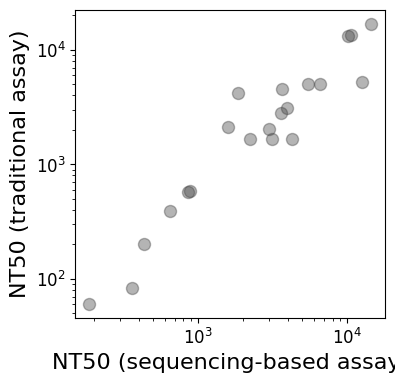

In [27]:
#Create a correlation plot and calculate the Pearson correlation
correlation = mergeddf.plot.scatter(y='nt50_GFPneut',x='titer',loglog=True,c='#444444',s=75, ylabel='NT50 (traditional assay)', xlabel="NT50 (sequencing-based assay)", fontsize=12,figsize=(4,4), alpha=0.4)
correlation.set_ylabel('NT50 (traditional assay)',fontdict= {'fontsize':16})
correlation.set_xlabel('NT50 (sequencing-based assay)',fontdict= {'fontsize':16})

correlation.figure.savefig("results/plots_for_paper/Fig4_correlation.svg")
mergeddf.corr(method="pearson",numeric_only=True)


In [28]:
#Create a column that just contains the day sampled
mergeddf['timepoint'] = mergeddf['serum'].str[7:]

In [29]:
#Create a plot of correlation colored by collection day
alt.Chart(mergeddf).mark_point(filled=True, size=75).encode( 
    x=alt.X('titer', scale=alt.Scale(type="log", domain=[40,40000], nice=False),axis=alt.Axis(title="NT50 (Sequencing-based Assay)")), 
    y=alt.Y('nt50_GFPneut', scale=alt.Scale(type="log", domain=[40,40000], nice=False),axis=alt.Axis(title="NT50 (Traditional Assay)")),
    color =alt.Color('timepoint:N', sort=['0','182'], title="days post vaccination",legend=alt.Legend(orient='right',labelLimit= 0)).scale(range = ['rebeccapurple', 'mediumseagreen']),
).properties(width = 250, height = 250).configure_axis(grid=False, domain=False,labelFontSize=14,titleFontSize=20).configure_legend(titleAlign='left',labelLimit= 0,
titleFontSize=15,
labelFontSize=16
)

alt.Chart(...)

In [30]:
#Create file with fit parameters
fitsdfseqneut = fits_seqbasedneut.fitParams(no_average=True, average_only=False)

In [31]:
#Make a list of sera for which we have replicates
replicates = ['D10159','D10042','D10041','D10256','D10366','D10191']

In [32]:
#Pull data for sera with replicates from dataframe
sera_withreps = fitsdfseqneut.loc[fitsdfseqneut['serum'].str.contains('D10042|D10041|D10191|D10159|D10256|D10396')]

In [33]:
#Split replicates into separate dataframes
sera_with_rep1 = sera_withreps.loc[~sera_withreps['replicate'].str.contains('plate13|plate11')].drop(columns = ['nreplicates','ic50','ic50_bound','ic50_str','midpoint_bound','midpoint_bound_type','top','bottom','r2'])
sera_with_rep2 = sera_withreps.loc[sera_withreps['replicate'].str.contains('plate13|plate11')].drop(columns = ['nreplicates','ic50','ic50_bound','ic50_str','midpoint_bound','midpoint_bound_type','top','bottom','r2'])

In [34]:
#Label columns so that these can be merged and plotted
sera_with_rep1['NT50_rep1'] = 1/sera_with_rep1['midpoint']
sera_with_rep2['NT50_rep2'] = 1/sera_with_rep2['midpoint']
sera_with_rep1['barcode'] = sera_with_rep1['replicate'].str.split("-").str[1]
sera_with_rep2['NT50_rep2'] = 1/sera_with_rep2['midpoint']
sera_with_rep2['barcode'] = sera_with_rep2['replicate'].str.split("-").str[1]


merged_replicates = sera_with_rep1.merge(sera_with_rep2, on=['serum','virus','barcode'])

In [35]:
#Rename merged directory and calculate median
merged_replicates_withbarcodes = merged_replicates
merged_replicates = merged_replicates.drop(columns=['replicate_x','replicate_y','barcode'])
merged_replicates = merged_replicates.groupby(['serum','virus']).median().reset_index()
merged_replicates

serum                         virus  midpoint_x    slope_x    rmsd_x  \
0     D10041d0        A/Bangladesh/2221/2021    0.004666   2.188542  0.056537   
1     D10041d0  A/Bangladesh/3210810034/2021    0.004139   6.185280  0.061255   
2     D10041d0        A/Bangladesh/8002/2021    0.006443   2.963878  0.037994   
3     D10041d0        A/Bangladesh/8036/2021    0.003969   2.665902  0.071802   
4     D10041d0          A/Belgium/H0017/2022    0.001796  10.000000  0.077559   
..         ...                           ...         ...        ...       ...   
535  D10396d30              A/Togo/0304/2021    0.000438   2.547100  0.122540   
536  D10396d30               A/Togo/845/2020    0.000985   1.707692  0.140046   
537  D10396d30                A/Utah/27/2022    0.000539   1.535382  0.139821   
538  D10396d30          A/Washington/23/2020    0.000183  10.000000  0.070869   
539  D10396d30          A/Wisconsin/588/2019    0.000198  10.000000  0.115069   

       NT50_rep1  midpoint_y    slope_y    rmsd_y    NT50_rep2  
0     214.298962    0.005263   4.886516  0.115616   190.005958  
1     252.709828    0.005204   5.908277  0.089621   192.149192  
2     155.207764    0.010228   9.998421  0.099961    97.769449  
3     251.982255    0.002935  10.000000  0.104940   340.688686  
4     556.641099    0.002214   3.308247  0.074782   451.615599  
..           ...         ...        ...       ...          ...  
535  2281.532542    0.001232   4.003444  0.093705   811.449968  
536  1014.995174    0.001996   3.349405  0.076013   500.946790  
537  1855.728413    0.001071   3.686098  0.059337   933.518091  
538  5467.265435    0.000155   1.977613  0.036056  6431.899333  
539  5052.971153    0.000308   3.173495  0.081011  3250.455909  

[540 rows x 10 columns]

<Axes: xlabel='NT50 (replicate 1, by strain)', ylabel='NT50 (replicate 2, by strain)'>

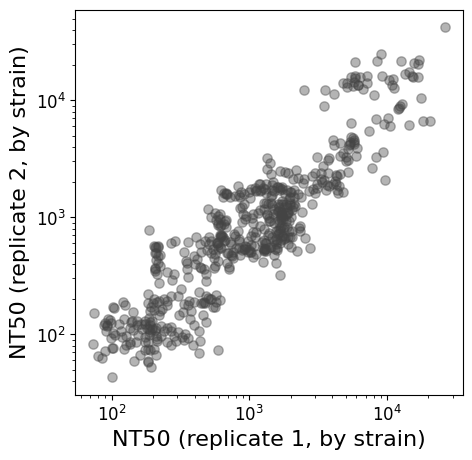

In [36]:
#Plot correlation by strain
merged_rep_filtered = merged_replicates.loc[merged_replicates['serum'].str.contains('D10191')]
correlation = merged_replicates.plot.scatter(x='NT50_rep1',y='NT50_rep2',loglog=True,c='#444444',s=45, xlabel='NT50 (replicate 1)', ylabel="NT50 (replicate 2)", fontsize=12,figsize=(5,5), alpha=0.4)
correlation.set_xlabel('NT50 (replicate 1, by strain)',fontdict= {'fontsize':16})
correlation.set_ylabel('NT50 (replicate 2, by strain)',fontdict= {'fontsize':16})
correlation

<Axes: xlabel='NT50 (replicate 1, by barcode)', ylabel='NT50 (replicate 2, by barcode)'>

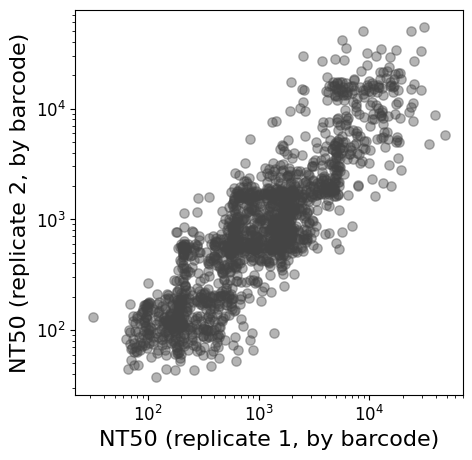

In [37]:
#Plot correlation by barcode
merged_replicates_withbarcodes_filtered = merged_replicates_withbarcodes.loc[merged_replicates_withbarcodes['serum'].str.contains('D10191')]
correlation = merged_replicates_withbarcodes.plot.scatter(x='NT50_rep1',y='NT50_rep2',loglog=True,c='#444444',s=45, xlabel='NT50 (replicate 1)', ylabel="NT50 (replicate 2)", fontsize=12,figsize=(5,5), alpha=0.4)
correlation.set_xlabel('NT50 (replicate 1, by barcode)',fontdict= {'fontsize':16})
correlation.set_ylabel('NT50 (replicate 2, by barcode)',fontdict= {'fontsize':16})
correlation

In [38]:
#Add columns for naming samples and days
merged_replicates_withbarcodes['individual'] = "Participant " + merged_replicates_withbarcodes['serum'].str[0:6]
merged_replicates_withbarcodes['day'] = "Day " + merged_replicates_withbarcodes['serum'].str[7:]

merged_replicates['individual'] = "Participant " + merged_replicates['serum'].str[0:6]
merged_replicates['day'] = "Day " + merged_replicates['serum'].str[7:]

In [40]:
#Make a dataframe where the first and second barcodes can be compared for each strain, first make dictionary and then add as column to plate
D10396 = merged_replicates_withbarcodes.loc[merged_replicates_withbarcodes['individual'] == "Participant D10396"]
D10396 = D10396.loc[D10396['replicate_x'].str.contains('plate8')]
D10396 = D10396[['serum', 'virus', 'replicate_x','NT50_rep1']].copy()
#D10396_pivot = D10396.pivot(index='replicate_x',columns='virus')
D10396_dict = dict(zip(D10396['replicate_x'],D10396['virus']))

strain_dict = {}
replicate_mapping = {}
for i in D10396_dict:
    barcode = i
    strain = D10396_dict[i]
    if strain not in strain_dict:
        strain_dict[strain] = []
        strain_dict[strain].append(barcode)
        replicate_mapping[barcode] = 'bar1'
    else:
        if len(strain_dict[strain]) < 2:
            strain_dict[strain].append(barcode)
            replicate_mapping[barcode] = 'bar2'
D10396['replicate_barcode'] = D10396['replicate_x'].map(replicate_mapping)
D10396.dropna()

D10396_pivot = D10396.dropna().pivot(columns='replicate_barcode',values='NT50_rep1',index=['virus','serum']).reset_index()
D10396_pivot

replicate_barcode                         virus      serum         bar1  \
0                        A/Bangladesh/2221/2021   D10396d0   146.365825   
1                        A/Bangladesh/2221/2021  D10396d30  1912.130617   
2                  A/Bangladesh/3210810034/2021   D10396d0   189.854820   
3                  A/Bangladesh/3210810034/2021  D10396d30  1827.554680   
4                        A/Bangladesh/8002/2021   D10396d0   187.859158   
..                                          ...        ...          ...   
67                               A/Utah/27/2022  D10396d30  1855.728413   
68                         A/Washington/23/2020   D10396d0   190.282078   
69                         A/Washington/23/2020  D10396d30  7170.117794   
70                         A/Wisconsin/588/2019   D10396d0   270.523721   
71                         A/Wisconsin/588/2019  D10396d30  4772.115582   

replicate_barcode         bar2  
0                   175.995499  
1                  1531.374130  
2                   350.296995  
3                  1866.040739  
4                    85.136400  
..                         ...  
67                 2871.536446  
68                         NaN  
69                 5283.590407  
70                  112.050381  
71                 5498.465642  

[72 rows x 4 columns]

In [41]:
#Make a dataframe where the first and second barcodes can be compared for each strain, first make dictionary and then add as column to plate
plate13 = merged_replicates_withbarcodes.loc[merged_replicates_withbarcodes['replicate_y'].str.contains("plate13")]
plate13 = plate13[['serum', 'virus', 'replicate_y','NT50_rep1','individual','day']].copy()
#D10396_pivot = D10396.pivot(index='replicate_x',columns='virus')
plate13_dict = dict(zip(plate13['replicate_y'],plate13['virus']))

strain_dict = {}
replicate_mapping = {}
for i in plate13_dict:
    barcode = i
    strain = plate13_dict[i]
    if strain not in strain_dict:
        strain_dict[strain] = []
        strain_dict[strain].append(barcode)
        replicate_mapping[barcode] = 'bar1'
    else:
        if len(strain_dict[strain]) < 2:
            strain_dict[strain].append(barcode)
            replicate_mapping[barcode] = 'bar2'
plate13['replicate_barcode'] = plate13['replicate_y'].map(replicate_mapping)
plate13.dropna()

plate13_pivot = plate13.dropna().pivot(columns='replicate_barcode',values='NT50_rep1',index=['virus','serum','individual','day']).reset_index()

In [43]:
alt.Chart(plate13_pivot).mark_point(filled=True).encode( 
    x=alt.X('bar1', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, barcode 1")), 
    y=alt.Y('bar2', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, barcode 2")),
    color =alt.Color('day:N', sort=['d0','d30','d182'], title="days post vaccination",legend=alt.Legend(orient='right',labelLimit= 0)).scale(range = ['rebeccapurple', 'mediumseagreen', 'firebrick']),
    opacity=alt.value(0.5),
    size=alt.value(55),
    facet=alt.Facet(
    "individual:N",
    header=alt.Header(
        labelFontSize=16, labelFontStyle="bold", labelPadding=0, title="Correlation in NT50s for replicate barcodes within the same plate", titleFontSize=20
    ),
    spacing=3,
    columns=3,
            )
).properties(width = 200, height = 200).configure_axis(grid=False, domain=False,labelFontSize=14,titleFontSize=16).configure_legend(titleAlign='left',labelLimit= 0,
titleFontSize=15,
labelFontSize=15
)

alt.Chart(...)

In [44]:
#Check correlations for each person on plate
serum = plate13_pivot['individual'].unique().tolist()
for i in serum:
    test=plate13_pivot.loc[plate13_pivot['individual'] == i].corr(method="pearson", numeric_only=True)
    print(i, test)

Participant D10042 replicate_barcode      bar1      bar2
replicate_barcode                    
bar1               1.000000  0.823199
bar2               0.823199  1.000000
Participant D10191 replicate_barcode     bar1     bar2
replicate_barcode                  
bar1               1.00000  0.89101
bar2               0.89101  1.00000
Participant D10396 replicate_barcode      bar1      bar2
replicate_barcode                    
bar1               1.000000  0.832742
bar2               0.832742  1.000000


In [45]:
#Make correlation plot for plates run on separate days
alt.Chart(merged_replicates.loc[merged_replicates['individual'].str.contains('D10042|D10191|D10396')]).mark_point(filled=True).encode( 
    x=alt.X('NT50_rep1', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, plate A")), 
    y=alt.Y('NT50_rep2', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, plate B")),
    color =alt.Color('day:N', sort=['Day 0','Day 30',' Day 182'], title="days post vaccination",legend=alt.Legend(orient='right',labelLimit= 0)).scale(range = ['rebeccapurple', 'firebrick', 'mediumseagreen']),
    opacity=alt.value(0.5),
    size=alt.value(55),
    facet=alt.Facet(
    "individual:N",
    header=alt.Header(
        labelFontSize=16, labelFontStyle="bold", labelPadding=0, title="Correlation in NT50s for each strain between plates run on different days", titleFontSize=20
    ),
    spacing=3,
    columns=3,
            )
).properties(width = 200, height = 200).configure_axis(grid=False, domain=False,labelFontSize=14,titleFontSize=16).configure_legend(titleAlign='left',labelLimit= 0,
titleFontSize=15,
labelFontSize=15
)

alt.Chart(...)

In [46]:
#Look at correlations for plots above
for i in serum:
    test=merged_replicates.loc[merged_replicates['individual'] == i].drop(columns = ['midpoint_x','midpoint_y','slope_x','slope_y']).corr(method="pearson", numeric_only=True)
    print(i, test)

Participant D10042              rmsd_x  NT50_rep1    rmsd_y  NT50_rep2
rmsd_x     1.000000  -0.068073 -0.326539  -0.107962
NT50_rep1 -0.068073   1.000000 -0.348182   0.914928
rmsd_y    -0.326539  -0.348182  1.000000  -0.292321
NT50_rep2 -0.107962   0.914928 -0.292321   1.000000
Participant D10191              rmsd_x  NT50_rep1    rmsd_y  NT50_rep2
rmsd_x     1.000000  -0.247543 -0.112460  -0.196649
NT50_rep1 -0.247543   1.000000 -0.112898   0.909873
rmsd_y    -0.112460  -0.112898  1.000000  -0.196676
NT50_rep2 -0.196649   0.909873 -0.196676   1.000000
Participant D10396              rmsd_x  NT50_rep1    rmsd_y  NT50_rep2
rmsd_x     1.000000  -0.375478  0.221985  -0.341001
NT50_rep1 -0.375478   1.000000 -0.504877   0.972149
rmsd_y     0.221985  -0.504877  1.000000  -0.421872
NT50_rep2 -0.341001   0.972149 -0.421872   1.000000
